In [1]:
# Import necessary libraries for data manipulation and analysis
import numpy as np # Numerical operations
import pandas as pd # Data manipulation
from datetime import datetime, timedelta # Date operations

#Import necessary libraries for transformations
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy import stats
from scipy.stats import skew, kurtosis

# Import libraries for plotting and visualization
import matplotlib.pyplot as plt # Matplotlib for basic plotting
import seaborn as sns # Seaborn for enhanced visualization
import plotly.express as px # Plotly for interactive plots

# Import libraries for time series analysis and modeling
from statsmodels.tsa.stattools import adfuller # Augmented Dickey-Fuller Test for stationarity check
from statsmodels.tsa.stattools import kpss # Kwiatkowski-Phillips-Schmidt-Shin Test for stationarity check
from statsmodels.tsa.statespace.sarimax import SARIMAX # SARIMAX model for time series forecasting
from statsmodels.tsa.seasonal import seasonal_decompose # Seasonal decomposition for trend, seasonal, and residual components
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from skforecast.model_selection_sarimax import backtesting_sarimax
from skforecast.model_selection_sarimax import grid_search_sarimax
from skforecast.Sarimax import Sarimax
from statsmodels.tsa.arima.model import ARIMA

# Import necessary libraries for computing acf and pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # For autocorrelation and partial autocorrelation plots
from statsmodels.tsa.stattools import acf, pacf  # For computing autocorrelation and partial autocorrelation

import joblib


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from pmdarima.arima import auto_arima #SARIMAX using pmdarima
from skforecast.ForecasterSarimax import ForecasterSarimax

SARIMAX for Mindanao

In [3]:
labels_csv = r'/Users/jojielyn/Desktop/School/04 Senior/Thesis/SARIMAX/Mindanao/train_labels_transformed.csv'
data_csv = r'/Users/jojielyn/Desktop/School/04 Senior/Thesis/SARIMAX/Mindanao/train_data_transformed.csv'
test_data_csv=r'/Users/jojielyn/Desktop/School/04 Senior/Thesis/SARIMAX/Mindanao/test_data.csv'
test_labels_csv=r'/Users/jojielyn/Desktop/School/04 Senior/Thesis/SARIMAX/Mindanao/test_labels.csv'
transformed_data=r'/Users/jojielyn/Desktop/School/04 Senior/Thesis/SARIMAX/Mindanao/data_transformed.csv'
complete_data = '/Users/jojielyn/Desktop/School/04 Senior/Thesis/SARIMAX/Mindanao/MIN_Daily_Complete.csv'

transformed_train_data = pd.read_csv(data_csv)
transformed_train_labels = pd.read_csv(labels_csv)
transformed_data = pd.read_csv(transformed_data)

test_data = pd.read_csv(test_data_csv)
test_labels = pd.read_csv(test_labels_csv)

complete_data_df = pd.read_csv(complete_data)
gwap = complete_data_df[['GWAP']]
lwap = complete_data_df[['LWAP']]



In [4]:
train_size = int(len(transformed_train_labels))  
test_size = int(len(test_data))

date_range = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
date_df = pd.DataFrame(date_range, columns=['Date'])

train_date = date_df[:train_size]
test_date = date_df[train_size:]

#Resetting the Index
train_date = train_date.reset_index(drop=True)
test_date = test_date.reset_index(drop=True)


In [6]:
#Preparing the dataframes
transformed_train_labels.rename(columns={'0': 'GWAP', '1': 'LWAP'}, inplace=True)
labels_columns = ['GWAP', 'LWAP']
labels_train = pd.DataFrame(transformed_train_labels, columns = labels_columns)
labels_test = pd.DataFrame(test_labels, columns = labels_columns)

transformed_train_data.rename(columns={'0':'GWAP', '1':'LWAP', '2':'FLOW_MIN','3':'RESERVE_GWAP_Fr','4':'RESERVE_GWAP_Ru','5':'RESERVE_GWAP_Rd','6':'RESERVE_GWAP_Dr','7':'Hourly Demand','8':'RAINFALL_Davao City', '9':'TMAX_Davao City', '10':'TMIN_Davao City','11':'RAINFALL_Surigao','12':'TMAX_Surigao','13':'TMIN_Surigao','14':'RAINFALL_Zamboanga','15':'TMAX_Zamboanga','16':'TMIN_Zamboanga','17':'RAINFALL_Dipolog','18':'TMAX_Dipolog','19':'TMIN_Dipolog','20':'RAINFALL_Butuan','21':'TMAX_Butuan','22':'TMIN_Butuan', '23':'RAINFALL_Malaybalay', '24':'TMAX_Malaybalay', '25':'TMIN_Malaybalay', '26':'RAINFALL_General Santos', '27':'TMAX_General Santos', '28':'TMIN_General Santos', '29':'RAINFALL_Cotabato', '30':'TMAX_Cotabato', '31':'TMIN_Cotabato'}, inplace=True)
data_columns = ['GWAP', 'LWAP', 'FLOW_MIN','RESERVE_GWAP_Fr','RESERVE_GWAP_Ru','RESERVE_GWAP_Rd','RESERVE_GWAP_Dr','Hourly Demand','RAINFALL_Davao City', 'TMAX_Davao City', 'TMIN_Davao City','RAINFALL_Surigao','TMAX_Surigao','TMIN_Surigao','RAINFALL_Zamboanga','TMAX_Zamboanga','TMIN_Zamboanga','RAINFALL_Dipolog','TMAX_Dipolog','TMIN_Dipolog','RAINFALL_Butuan','TMAX_Butuan','TMIN_Butuan', 'RAINFALL_Malaybalay', 'TMAX_Malaybalay', 'TMIN_Malaybalay', 'RAINFALL_General Santos', 'TMAX_General Santos', 'TMIN_General Santos', 'RAINFALL_Cotabato', 'TMAX_Cotabato', 'TMIN_Cotabato']
data_train = pd.DataFrame(transformed_train_data, columns = data_columns)
data_test = pd.DataFrame(test_data, columns = data_columns)

transformed_data.rename(columns={'0':'GWAP', '1':'LWAP', '2':'FLOW_MIN','3':'RESERVE_GWAP_Fr','4':'RESERVE_GWAP_Ru','5':'RESERVE_GWAP_Rd','6':'RESERVE_GWAP_Dr','7':'Hourly Demand','8':'RAINFALL_Davao City', '9':'TMAX_Davao City', '10':'TMIN_Davao City','11':'RAINFALL_Surigao','12':'TMAX_Surigao','13':'TMIN_Surigao','14':'RAINFALL_Zamboanga','15':'TMAX_Zamboanga','16':'TMIN_Zamboanga','17':'RAINFALL_Dipolog','18':'TMAX_Dipolog','19':'TMIN_Dipolog','20':'RAINFALL_Butuan','21':'TMAX_Butuan','22':'TMIN_Butuan', '23':'RAINFALL_Malaybalay', '24':'TMAX_Malaybalay', '25':'TMIN_Malaybalay', '26':'RAINFALL_General Santos', '27':'TMAX_General Santos', '28':'TMIN_General Santos', '29':'RAINFALL_Cotabato', '30':'TMAX_Cotabato', '31':'TMIN_Cotabato'}, inplace=True)

In [7]:
#lagging the transformed data
transformed_data = transformed_data.shift(1)
transformed_data = transformed_data.fillna(0)

#Removing GWAP and LWAP
transformed_exog = transformed_data.drop(columns=['GWAP','LWAP'])

#Preparing the exog datasets
train_exog = transformed_exog[:train_size]
test_exog = transformed_exog[train_size:]



In [9]:
#Preparing transformed GWAP datasets
GWAP_train = labels_train['GWAP']
GWAP_train = pd.concat([train_date,GWAP_train], axis=1)
GWAP_train.set_index('Date', inplace=True)
GWAP_train.index = pd.to_datetime(GWAP_train.index)
GWAP_train.index.freq='D'
GWAP_train = GWAP_train.squeeze()


GWAP_test = labels_test['GWAP']
GWAP_test = pd.concat([test_date,GWAP_test], axis=1)
GWAP_test.set_index('Date', inplace=True)
GWAP_test.index = pd.to_datetime(GWAP_test.index)
GWAP_test.index.freq='D'
GWAP_test = GWAP_test.squeeze()

#Preparing original GWAP datasets
GWAP = pd.concat([date_df,gwap], axis=1)
GWAP.set_index('Date', inplace=True)
GWAP.index = pd.to_datetime(GWAP.index)
GWAP.index.freq='D'
GWAP = GWAP.squeeze()

GWAP_test_inversed = GWAP[train_size:]




#Preparing the transformed LWAP datasets
LWAP_train = labels_train['LWAP']
LWAP_train = pd.concat([train_date,LWAP_train], axis=1)
LWAP_train.set_index('Date', inplace=True)
LWAP_train.index = pd.to_datetime(LWAP_train.index)
LWAP_train.index.freq='D'
LWAP_train = LWAP_train.squeeze()

LWAP_test = labels_test['LWAP']
LWAP_test = pd.concat([test_date,LWAP_test], axis=1)
LWAP_test.set_index('Date', inplace=True)
LWAP_test.index = pd.to_datetime(LWAP_test.index)
LWAP_test.index.freq='D'
LWAP_test = LWAP_test.squeeze()

#Preparing the original LWAP datasets

LWAP = pd.concat([date_df,lwap], axis=1)
LWAP.set_index('Date', inplace=True)
LWAP.index = pd.to_datetime(LWAP.index)
LWAP.index.freq='D'
LWAP = LWAP.squeeze()

LWAP_test_inversed = LWAP[train_size:]



#Preparing the exogenous datasets
exog_train = pd.concat([train_date,train_exog], axis=1)
exog_train.set_index('Date', inplace=True)

exog_test = pd.concat([test_date,test_exog], axis=1)
exog_test.set_index('Date', inplace=True)

In [10]:
#Plotting Train LWAP ang GWAP
# Create the line plot
gwap_plot = px.line(GWAP_train, x=GWAP_train.index, y='GWAP')
lwap_plot = px.line(LWAP_train, x=LWAP_train.index, y='LWAP')
# Set the title using the ticker value
gwap_plot.update_layout(title=f"Mindanao GWAP")
lwap_plot.update_layout(title=f"Mindanao LWAP")
# Display the plot
gwap_plot.show()
lwap_plot.show()

In [11]:
def perform_differencing(data, max_differences=3):
    # Function to check if data is stationary using ADF
    def adf_test(series):
        result = adfuller(series)
        return result[1]  # p-value

    # Function to check if data is stationary using KPSS
    def kpss_test(series):
        result = kpss(series, regression='c')
        return result[1]  # p-value

    # Check initial stationarity
    for i in range(max_differences):
        adf_p_value = adf_test(data)
        kpss_p_value = kpss_test(data)

        # If ADF p-value is less than 0.05 and KPSS p-value is greater than 0.05, it's stationary
        if adf_p_value < 0.05 and kpss_p_value > 0.05:
            print(f"Data is stationary after differencing {i} times.")
            return data

        # If not stationary, apply differencing
        data = data.diff().dropna()

    print(f"Data could not be made stationary after {max_differences} differencing operations.")
    return data

#same test for dataframe
def perform_df_differencing(data, max_differences=3):
    # Function to check if data is stationary using ADF
    def adf_test(series):
        result = adfuller(series)
        return result[1]  # p-value

    # Function to check if data is stationary using KPSS 
    def kpss_test(series):
        result = kpss(series, regression='c')
        return result[1]  # p-value

    # Store in new DataFrame
    diff_exog = pd.DataFrame(index=data.index)

    # Check each column in the DataFrame
    for column in data.columns:
        series = data[column].copy()  # Copy the series to avoid modifying the original

        for i in range(max_differences):
            adf_p_value = adf_test(series)
            kpss_p_value = kpss_test(series)

            # If stationary, break the loop and store the series
            if adf_p_value < 0.05 and kpss_p_value > 0.05:
                print(f"Column '{column}' is stationary after differencing {i} times.")
                diff_exog[column] = series  # Store the stationary series
                break

            # If not stationary, apply differencing
            if i < max_differences - 1:  # Don't drop NA on the last iteration
                series = series.diff().dropna()

        else:  # This else corresponds to the for-loop
            print(f"Column '{column}' could not be made stationary after {max_differences} differencing operations.")
            diff_exog[column] = series  # Store the last differenced result

    return diff_exog


In [12]:
#Checking for stationarity in GWAP data
perform_differencing(GWAP_train)
perform_differencing(LWAP_train)

diff_exog = perform_df_differencing(train_exog)
diff_exog = diff_exog.fillna(0)


Data is stationary after differencing 0 times.
Data is stationary after differencing 0 times.
Column 'FLOW_MIN' is stationary after differencing 1 times.
Column 'RESERVE_GWAP_Fr' is stationary after differencing 1 times.
Column 'RESERVE_GWAP_Ru' is stationary after differencing 1 times.
Column 'RESERVE_GWAP_Rd' is stationary after differencing 1 times.
Column 'RESERVE_GWAP_Dr' is stationary after differencing 1 times.
Column 'Hourly Demand' is stationary after differencing 0 times.
Column 'RAINFALL_Davao City' is stationary after differencing 0 times.
Column 'TMAX_Davao City' is stationary after differencing 0 times.
Column 'TMIN_Davao City' is stationary after differencing 0 times.
Column 'RAINFALL_Surigao' is stationary after differencing 1 times.
Column 'TMAX_Surigao' is stationary after differencing 0 times.
Column 'TMIN_Surigao' is stationary after differencing 1 times.
Column 'RAINFALL_Zamboanga' is stationary after differencing 0 times.
Column 'TMAX_Zamboanga' is stationary afte

/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_51675/2411308064.py:9: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_51675/2411308064.py:9: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_51675/2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_51675/2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value return

In [13]:
diff_exog = pd.concat([train_date,diff_exog], axis=1)
diff_exog.set_index('Date', inplace=True)

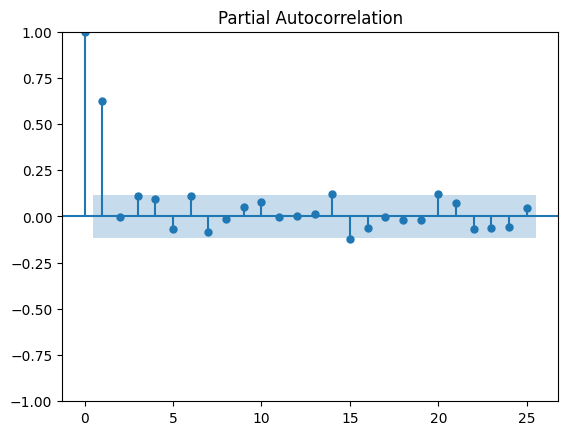

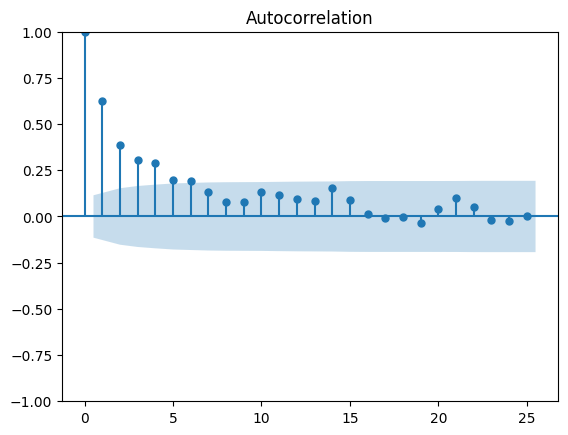

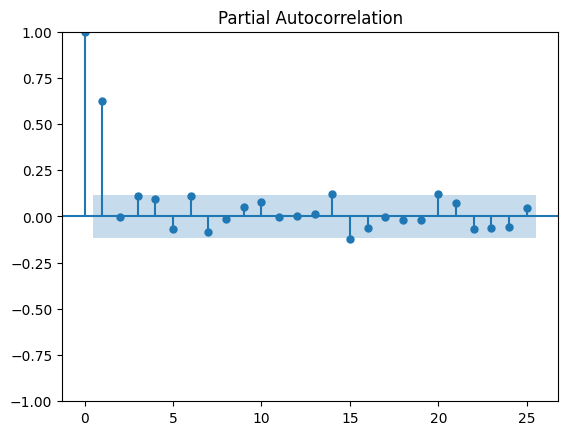

In [14]:
# Visualize autocorrelation using plot_acf
plot_acf(GWAP_train, lags=25, alpha=0.05)  # Plot autocorrelation using plot_acf with confidence interval
# Generate a partial autocorrelation plot
plot_pacf(GWAP_train, lags=25, alpha=0.05)

In [15]:
#PACF for GWAP cuts off at lag 1; ACF for LWAP cuts off at lag 5
#Auto-Arima: Identification of best orders using AIC
MIN_GWAP_sarimax = auto_arima(GWAP_train, 
                            start_p=0, start_d=0, start_q=0,
                            max_p=1, max_d=2, max_q=5,
                            error_action='warn', trace=True,
                            suppress_warnings=True, stepwise=True,
                            exog=diff_exog)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-361.425, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-503.017, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-467.580, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=355.125, Time=0.34 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-501.108, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-446.256, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.647 seconds


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



,GWAP
2023-10-20,0.372751
2023-10-21,0.404206
2023-10-22,0.386141
2023-10-23,0.312046
2023-10-24,0.350086
2023-10-25,0.350557
2023-10-26,0.358759
2023-10-27,0.329938
2023-10-28,0.316225
2023-10-29,0.345009


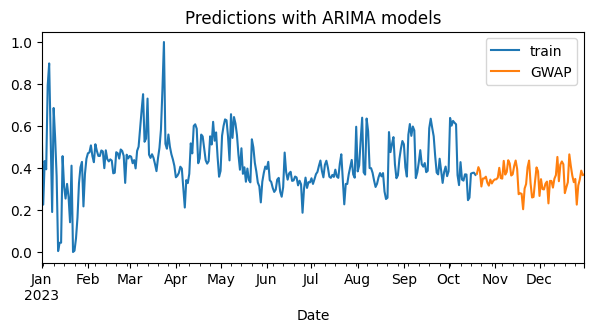

In [16]:
#Using skforecast
gwap_model = Sarimax(order=(1, 0, 0), sm_predict_kwargs={'dynamic': True})
gwap_model.fit(y=GWAP_train, exog= diff_exog)
gwap_model.summary()

# Prediction
# ==============================================================================
gwap_predictions = gwap_model.predict(steps=len(GWAP_test), exog=test_exog)
gwap_predictions.columns = ['GWAP']
display(gwap_predictions.head(10))

#Plot predictions
# ==============================================================================
fig, ax = plt.subplots(figsize=(7, 3))
GWAP_train.plot(ax=ax, label='train')
gwap_predictions.plot(ax=ax, label='Predictions')
ax.set_title('Predictions with ARIMA models')
ax.legend()


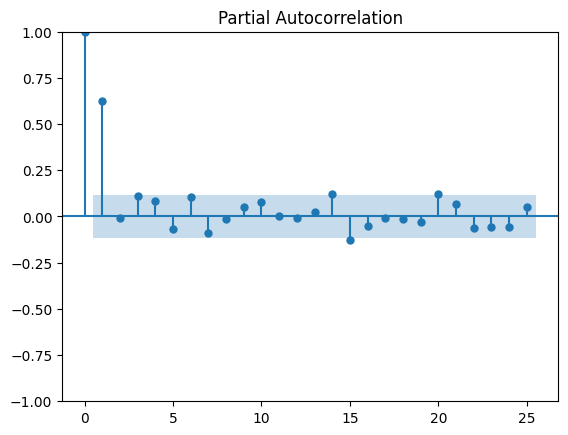

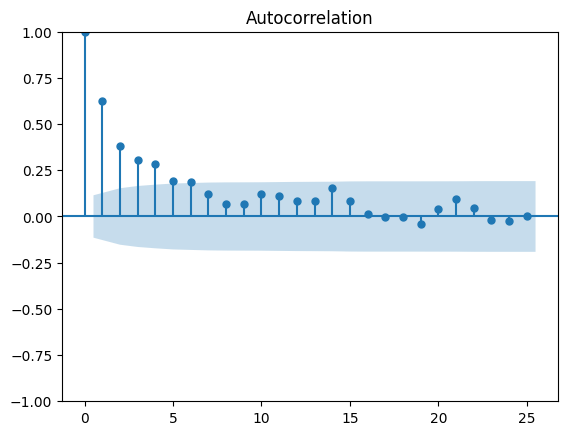

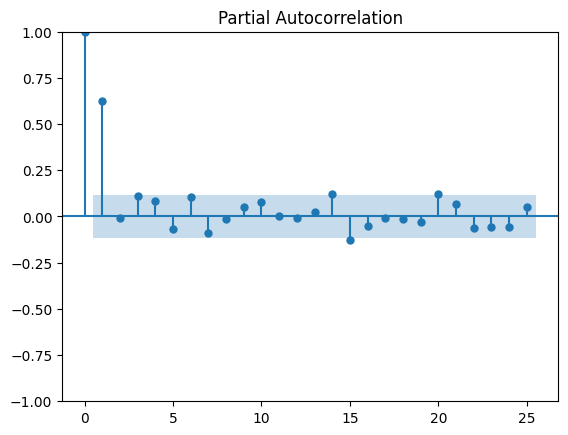

In [17]:
#Mindanao LWAP
# Visualize autocorrelation using plot_acf
plot_acf(LWAP_train, lags=25, alpha=0.05)  # Plot autocorrelation using plot_acf with confidence interval
# Generate a partial autocorrelation plot
plot_pacf(LWAP_train, lags=25, alpha=0.05)

In [18]:
#PACF for LWAP cuts off at lag 1; ACF for LWAP cuts off at lag 4
#Auto-Arima: Identification of best orders using AIC
MIN_LWAP_sarimax = auto_arima(LWAP_train, 
                            start_p=0, start_d=0, start_q=0,
                            max_p=1, max_d=2, max_q=4, 
                            seasonal=False,
                            error_action='warn', trace=True,
                            suppress_warnings=True, stepwise=False,
                            exog=diff_exog, iter=1000)

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=355.192, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=61.818, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-133.376, Time=0.03 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-184.272, Time=0.04 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=-276.553, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-449.508, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-465.272, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-490.160, Time=0.06 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-494.179, Time=0.10 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=-492.171, Time=0.13 sec

Best model:  ARIMA(1,0,3)(0,0,0)[0]          
Total fit time: 0.543 seconds


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



,LWAP
2023-10-20,0.398074
2023-10-21,0.422996
2023-10-22,0.409206
2023-10-23,0.275681
2023-10-24,0.386215
2023-10-25,0.371171
2023-10-26,0.342604
2023-10-27,0.332477
2023-10-28,0.364563
2023-10-29,0.349450


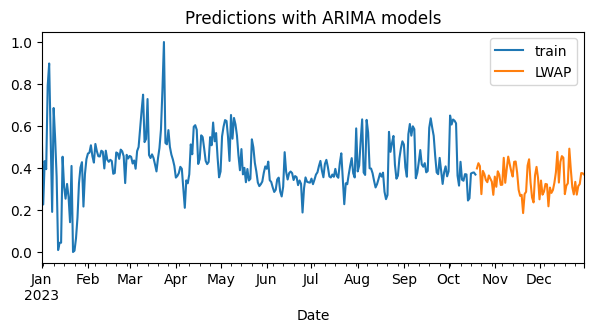

In [19]:
#Using skforecast
model_lwap = Sarimax(order=(1, 0, 3), sm_predict_kwargs={'dynamic': True})
model_lwap.fit(y=LWAP_train, exog= diff_exog)
model_lwap.summary()

# Prediction
# ==============================================================================
lwap_predictions = model_lwap.predict(steps=len(LWAP_test), exog=test_exog)
lwap_predictions.columns = ['LWAP']
display(lwap_predictions.head(10))

#Plot predictions
# ==============================================================================
fig, ax = plt.subplots(figsize=(7, 3))
LWAP_train.plot(ax=ax, label='train')
lwap_predictions.plot(ax=ax, label='LWAP Predictions')
ax.set_title('Predictions with ARIMA models')
ax.legend()


In [21]:
#Applying the inverse transformations
#Loading inverse transformations for Mindanao

min_minmax_fit_loaded = joblib.load('/Users/jojielyn/Desktop/School/04 Senior/Thesis/SARIMAX/Mindanao/minmax_scaler.pkl')
min_boxcox_fit_loaded = joblib.load('/Users/jojielyn/Desktop/School/04 Senior/Thesis/SARIMAX/Mindanao/boxcox_pipeline.pkl')
min_yeojohnson_fit_loaded = joblib.load('/Users/jojielyn/Desktop/School/04 Senior/Thesis/SARIMAX/Mindanao/yeojohnson_pipeline.pkl')
min_boxcoxy_fit_loaded = joblib.load('/Users/jojielyn/Desktop/School/04 Senior/Thesis/SARIMAX/Mindanao/boxcox_pipeliney.pkl')

In [22]:
min_predictions = pd.concat([gwap_predictions, lwap_predictions], axis=1)
min_predictions_inverse=min_boxcoxy_fit_loaded.inverse_transform(min_predictions)
min_predictions_inverse

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but PowerTransformer was fitted with feature names



array([[3859.33877633, 4523.21132709],
       [4413.8602806 , 5004.87721768],
       [4091.50921209, 4735.79282682],
       [2880.34619651, 2469.28503467],
       [3479.59996795, 4301.37609854],
       [3487.31498403, 4026.86361449],
       [3622.93137823, 3527.07118477],
       [3156.19089857, 3356.72324085],
       [2943.81528773, 3908.7377468 ],
       [3396.84068055, 3644.26146783],
       [3102.81281342, 3397.04288049],
       [3301.43084105, 2420.6396423 ],
       [3408.50646436, 3812.66795314],
       [3416.18898209, 3002.63457358],
       [3545.51999615, 4267.30297916],
       [4355.03245506, 3973.806441  ],
       [3511.77092854, 3142.59267349],
       [3469.33880715, 3160.87003375],
       [4967.71495633, 5520.04368626],
       [3790.16133087, 3310.30469436],
       [4004.1072776 , 4480.49935556],
       [5027.38100007, 5637.93977544],
       [4743.36800415, 4923.80517105],
       [3716.75580378, 4294.07176578],
       [3813.5431352 , 3816.92494753],
       [4513.4195877 , 51

In [23]:
min_predictions_inverse_df = pd.DataFrame(min_predictions_inverse)
min_predictions_inverse_df.rename(columns={'0': 'GWAP', '1': 'LWAP'}, inplace=True)

MIN_GWAP_predictions_inverse = pd.DataFrame(min_predictions_inverse[:, 0], columns=['GWAP'])
MIN_GWAP_predictions_inverse = pd.concat([test_date,MIN_GWAP_predictions_inverse], axis=1)
MIN_GWAP_predictions_inverse.set_index('Date', inplace=True)
MIN_GWAP_predictions_inverse.index = pd.to_datetime(MIN_GWAP_predictions_inverse.index)
MIN_GWAP_predictions_inverse.index.freq='D'
MIN_GWAP_predictions_inverse = MIN_GWAP_predictions_inverse.squeeze()

MIN_LWAP_predictions_inverse = pd.DataFrame(min_predictions_inverse[:, 0], columns=['LWAP'])
MIN_LWAP_predictions_inverse = pd.concat([test_date,MIN_LWAP_predictions_inverse], axis=1)
MIN_LWAP_predictions_inverse.set_index('Date', inplace=True)
MIN_LWAP_predictions_inverse.index = pd.to_datetime(MIN_LWAP_predictions_inverse.index)
MIN_LWAP_predictions_inverse.index.freq='D'
MIN_LWAP_predictions_inverse = MIN_LWAP_predictions_inverse.squeeze()




Mean Absolute Error (MAE) on Test Set: 748.5586047488433
Root Mean Squared Error (RMSE) on Test Set: 942.6623105017838


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



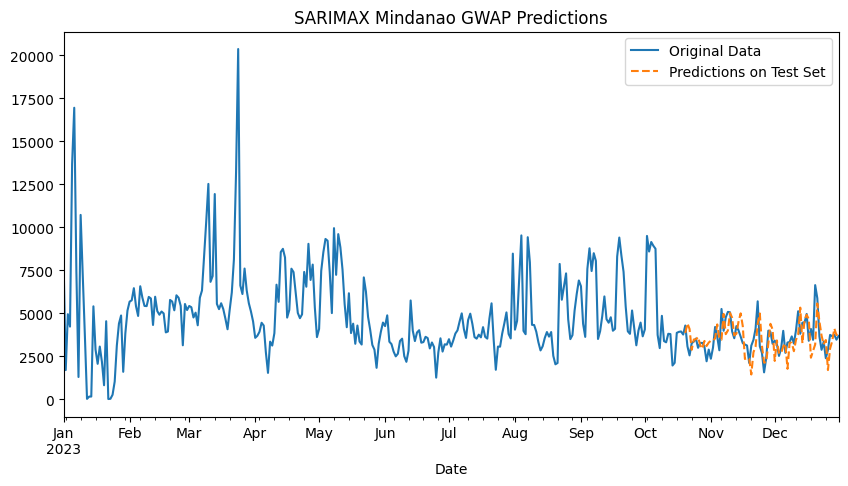

In [27]:
# Calculate MAE for the MINDANAO GWAP test set
mae_test = mean_absolute_error(GWAP_test_inversed, MIN_GWAP_predictions_inverse)
print(f"Mean Absolute Error (MAE) on Test Set: {mae_test}")

# Calculate MSE for the MINDANAO GWAP test set
rmse_test = mean_squared_error(GWAP_test_inversed, MIN_GWAP_predictions_inverse, squared=False)
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse_test}")

# Plot predictions
fig, ax = plt.subplots(figsize=(10, 5))
GWAP.plot(ax=ax, label='Original Data') 
MIN_GWAP_predictions_inverse.plot(ax=ax, label='Predictions on Test Set', linestyle='--')
ax.set_title('SARIMAX Mindanao GWAP Predictions')
ax.legend()
plt.show()

Mean Absolute Error (MAE) on Test Set: 795.73154595985
Root Mean Squared Error (RMSE) on Test Set: 1017.2639781795356


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



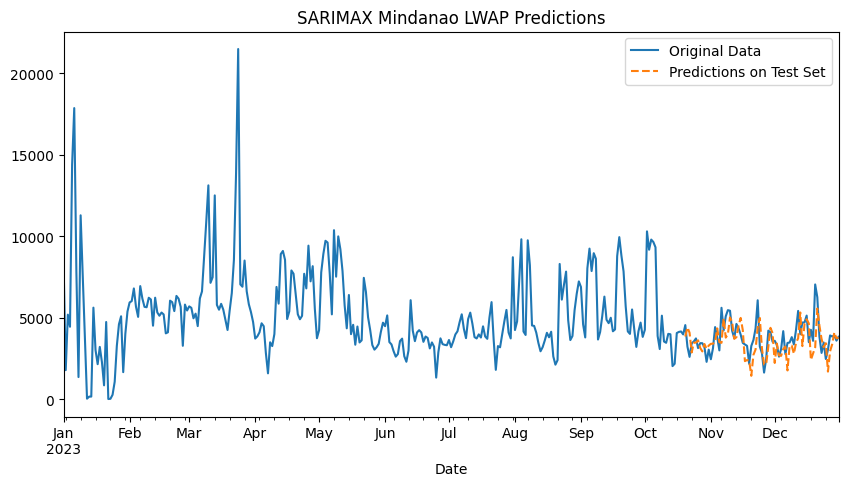

In [26]:
# Calculate MAE for the Mindanao LWAP test set
mae_test = mean_absolute_error(LWAP_test_inversed, MIN_LWAP_predictions_inverse)
print(f"Mean Absolute Error (MAE) on Test Set: {mae_test}")

# Calculate MSE for the Mindanao LWAP test set
rmse_test = mean_squared_error(LWAP_test_inversed, MIN_LWAP_predictions_inverse, squared=False)
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse_test}")

# Plot predictions
fig, ax = plt.subplots(figsize=(10, 5))
LWAP.plot(ax=ax, label='Original Data')
MIN_LWAP_predictions_inverse.plot(ax=ax, label='Predictions on Test Set', linestyle='--')
ax.set_title('SARIMAX Mindanao LWAP Predictions')
ax.legend()
plt.show()